In [ ]:
!ffmpeg -f alaw -ar 8000 -ac 1 -i input.mp4 output.wav

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
# для mpeg
!ffmpeg -i input.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
!ffmpeg -i input.mp4 -acodec pcm_mulaw -ar 16000 -ac 1 output.wav

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
!ffmpeg -i input.wav -c:a pcm_s16le output_pcm.wav

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
from scipy.io import wavfile

# Чтение WAV-файла
sample_rate, audio_data = wavfile.read("output_pcm.wav")
print("Частота дискретизации:", sample_rate)
print("Аудиоданные:", audio_data)

Частота дискретизации: 8000
Аудиоданные: [    0     0     0 ...  -428 -2620 -3516]


In [ ]:
import wave

with wave.open("output_pcm.wav", "rb") as wav_file:
    print("Частота дискретизации:", wav_file.getframerate())
    print("Количество каналов:", wav_file.getnchannels())
    print("Битовая глубина:", wav_file.getsampwidth() * 8)
    print("Количество фреймов:", wav_file.getnframes())

Частота дискретизации: 8000
Количество каналов: 1
Битовая глубина: 16
Количество фреймов: 6697472


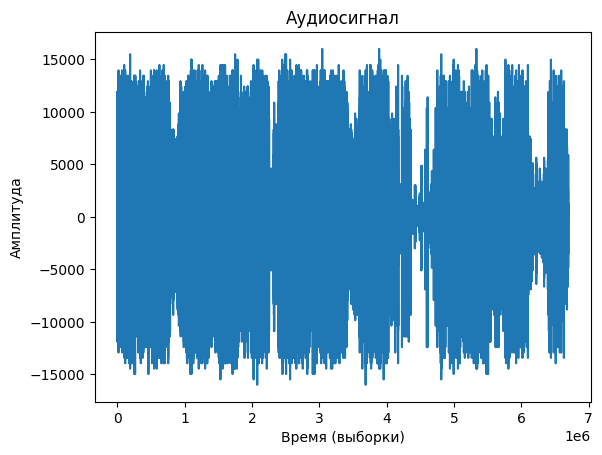

In [ ]:
import matplotlib.pyplot as plt

plt.plot(audio_data)
plt.title("Аудиосигнал")
plt.xlabel("Время (выборки)")
plt.ylabel("Амплитуда")
plt.show()

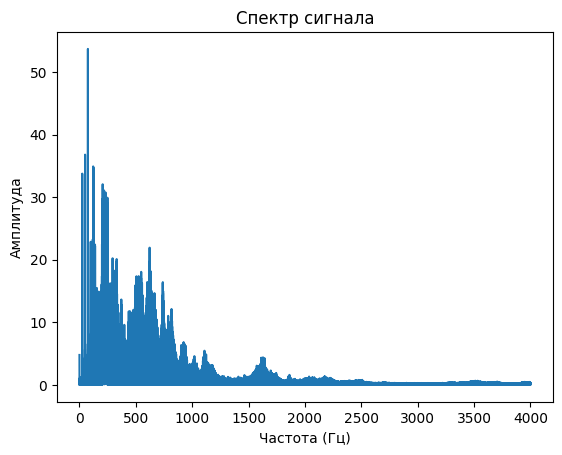

In [ ]:
from scipy.fft import fft, fftfreq

# Вычисление FFT
N = len(audio_data)
T = 1.0 / sample_rate
yf = fft(audio_data)
xf = fftfreq(N, T)[:N//2]

plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.title("Спектр сигнала")
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.show()

In [ ]:
from scipy.signal import butter, filtfilt

# Создание фильтра нижних частот
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

# Применение фильтра
filtered_data = butter_lowpass_filter(audio_data, cutoff=1000, fs=sample_rate)

In [ ]:
!pip3 install pydub

In [ ]:
from pydub import AudioSegment

# Загрузка аудио
audio = AudioSegment.from_file("output_pcm.wav")

# Увеличение громкости
louder_audio = audio + 10  # Увеличение на 10 дБ

# Экспорт очищенного аудио
louder_audio.export("cleaned_output.wav", format="wav")

<_io.BufferedRandom name='cleaned_output.wav'>

In [ ]:
!ffmpeg -i output_pcm.wav -ar 16000 -ac 1 -sample_fmt s16 cleaned_output.wav

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
!ffmpeg -i HW.mp3 -ar 8000 -acodec pcm_alaw outputalaw.wav -y
!ffmpeg -i outputalaw.wav -af "pan=mono|c0=0.5*FL+0.5*FR" -acodec pcm_s16le output.wav -y
!ffprobe output.wav

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Загрузка аудиофайла
audio_binary = tf.io.read_file('output.wav')
audio, sample_rate = tf.audio.decode_wav(audio_binary, desired_channels=1)
# проверка формы тензора
print(audio.shape)
# Выбор одного канала
# сразу моно audio = audio[:, 0, :]  # Берём первый канал
# Или усреднение каналов
# сразу моно audio = tf.reduce_mean(audio, axis=1)


audio = tf.squeeze(audio, axis=-1)

# Вычисление спектрограммы
stft = tf.signal.stft(audio, frame_length=256, frame_step=128)

# преобразование в абсолютные значения
spectrogram = tf.abs(stft)
# Нормализация спектрограммы
spectrogram = spectrogram / tf.reduce_max(spectrogram)

# Преобразование в децибелы
spectrogram_db = 20 * tf.math.log(spectrogram + 1e-6) / tf.math.log(10.0)

# Отображение спектрограммы
plt.figure(figsize=(32, 8))
plt.imshow(tf.transpose(spectrogram), aspect='auto', origin='lower', cmap='viridis')
plt.title('Spectrogram')
plt.xlabel('Time Frames')
plt.ylabel('Frequency Bins')
plt.colorbar(label='Amplitude')
plt.show()
plt.figure(figsize=(32, 8))
plt.imshow(tf.transpose(spectrogram_db), aspect='auto', origin='lower', cmap='viridis')
plt.title('Spectrogram decibell')
plt.xlabel('Time Frames')
plt.ylabel('Frequency Bins')
plt.colorbar(label='Amplitude')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!pip install SpeechRecognition

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 27.0 MB/s eta 0:00:00


In [ ]:
import speech_recognition as sr

# Инициализация распознавателя
recognizer = sr.Recognizer()

# Загрузка WAV-файла
with sr.AudioFile("output.wav") as source:
    audio_data = recognizer.record(source)
    text = recognizer.recognize_google(audio_data, language="en-EN")

print("Распознанный текст:", text)

Распознанный текст: what is love you don't
